# Load the Data

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # change the file name if necessary

# Load the data into a DataFrame
df = pd.read_csv(file_name, delimiter=',')  # Ensure the delimiter matches your file's format


Saving train_all_tasks.csv to train_all_tasks (1).csv


#Data Cleaning

In [ ]:
# Display basic info about the dataframe to understand any missing values or incorrect datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
dtypes: object(5)
memory usage: 547.0+ KB
None


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

                  rewire_id  \
0   sexism2022_english-7358   
1   sexism2022_english-2367   
2   sexism2022_english-3073   
3  sexism2022_english-14895   
4   sexism2022_english-4118   

                                                text label_sexist  \
0              Damn, this writing was pretty chaotic   not sexist   
1  Yeah, and apparently a bunch of misogynistic v...   not sexist   
2       How the FUCK is this woman still an MP!!!???   not sexist   
3  Understand. Know you're right. At same time I ...   not sexist   
4     Surprized they didn't stop and rape some women   not sexist   

  label_category label_vector  
0           none         none  
1           none         none  
2           none         none  
3           none         none  
4           none         none  


In [ ]:
# Check for and sum up any missing values by column
print(df.isnull().sum())

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
dtype: int64


In [ ]:
# Drop rows with any missing 'text' or 'label_sexist' data
if df.isnull().sum().any():
    df.dropna(subset=['text', 'label_sexist'], inplace=True)


# # Optional: Reset index after dropping rows
# df.reset_index(drop=True, inplace=True)

#Step 3: Text Preprocessing

In [ ]:
df.columns

Index(['rewire_id', 'text', 'label_sexist', 'label_category', 'label_vector'], dtype='object')

In [ ]:
import re
from nltk.stem import PorterStemmer
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to preprocess text
def clean_text(text):

    # convert to lowercase
    text = str(text).lower()

    # remove single characters
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text)

    # Remove URls, whitespace characters
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)

    # Removes all the special characters, digits from 0-9 and Capital Letters
    text = re.sub(r'[^a-z\s]',' ',string = text)

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', string = text)

    # create stemming object
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

# Check if 'text' column exists in DataFrame
if 'text' in df.columns:
    # Apply preprocessing to each text entry
    df['text'] = df['text'].apply(clean_text)
    # Check the processed text
    print(df.head())
else:
    print("'text' column does not exist in the DataFrame.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  rewire_id  \
0   sexism2022_english-7358   
1   sexism2022_english-2367   
2   sexism2022_english-3073   
3  sexism2022_english-14895   
4   sexism2022_english-4118   

                                                text label_sexist  \
0                          damn write pretti chaotic   not sexist   
1  yeah apparentlybunch misogynist virgin one tur...   not sexist   
2                                fuck woman still mp   not sexist   
3  understand know right timeknow enough money wo...   not sexist   
4                            surpriz stop rape women   not sexist   

  label_category label_vector  
0           none         none  
1           none         none  
2           none         none  
3           none         none  
4           none         none  


##Exploratory Data Analysis (EDA)
#Class Distribution

label_sexist
not sexist    10602
sexist         3398
Name: count, dtype: int64


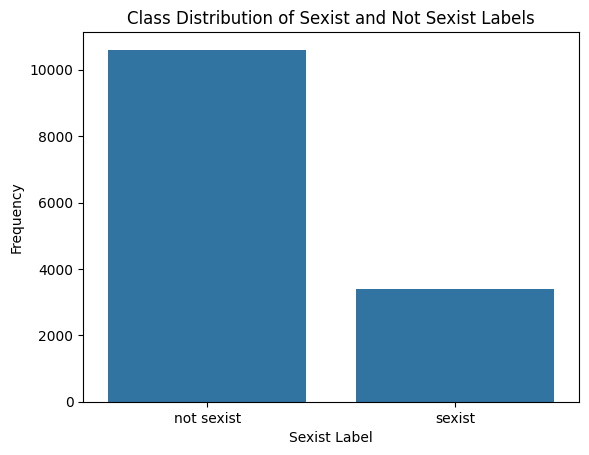

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_distribution = df['label_sexist'].value_counts()
print(class_distribution)

# Plot the distribution
sns.countplot(x=df['label_sexist'])
plt.title('Class Distribution of Sexist and Not Sexist Labels')
plt.xlabel('Sexist Label')
plt.ylabel('Frequency')
plt.show()


# Text Analysis
* Common Words by Category

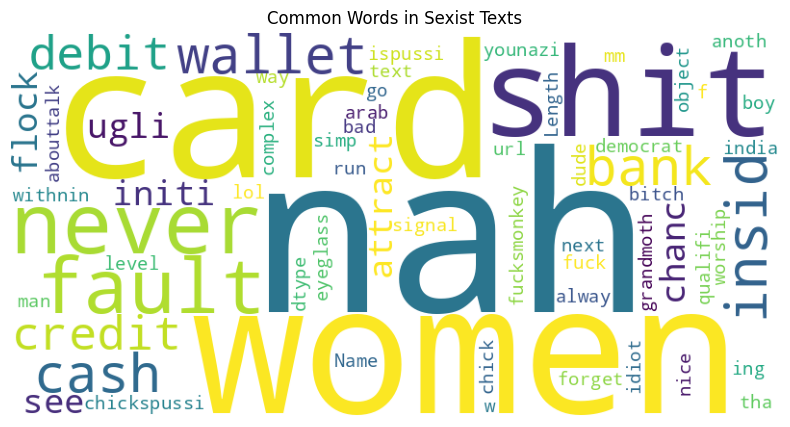

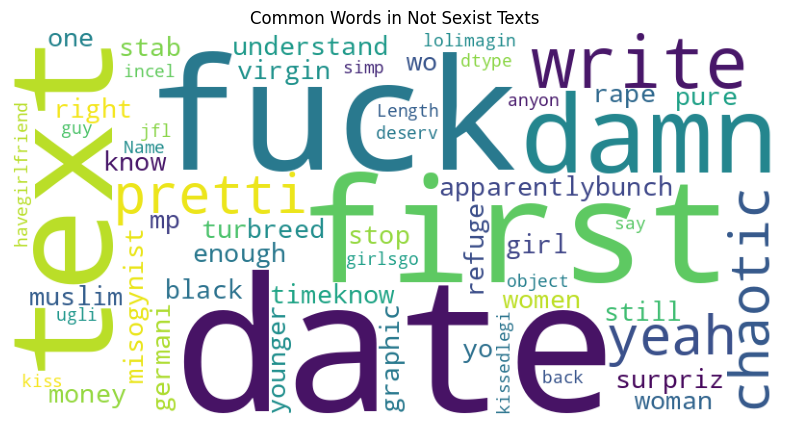

In [ ]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each category
sexist_text = df[df['label_sexist'] == 'sexist']['text']
not_sexist_text = df[df['label_sexist'] == 'not sexist']['text']

generate_word_cloud(sexist_text, 'Common Words in Sexist Texts')
generate_word_cloud(not_sexist_text, 'Common Words in Not Sexist Texts')


#Average Length of Texts



Average length of sexist texts: 75.47
Average length of not sexist texts: 70.30


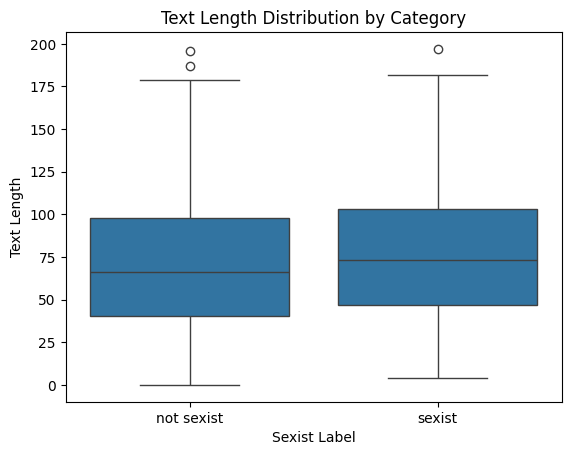

In [ ]:
# Calculate average length of the texts
df['text_length'] = df['text'].apply(len)
average_length_sexist = df[df['label_sexist'] == 'sexist']['text_length'].mean()
average_length_not_sexist = df[df['label_sexist'] == 'not sexist']['text_length'].mean()

print(f"Average length of sexist texts: {average_length_sexist:.2f}")
print(f"Average length of not sexist texts: {average_length_not_sexist:.2f}")

# Boxplot for text length distribution by category
sns.boxplot(x='label_sexist', y='text_length', data=df)
plt.title('Text Length Distribution by Category')
plt.xlabel('Sexist Label')
plt.ylabel('Text Length')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X=tfidf.fit_transform(df['text']).toarray()

#tfidf.get_feature_names()[:50]

tfidf.get_params()
tfidf.vocabulary_

{'damn': 946,
 'write': 4951,
 'pretti': 3333,
 'yeah': 4969,
 'misogynist': 2771,
 'virgin': 4590,
 'one': 3044,
 'woman': 4775,
 'straight': 4094,
 'lol': 2508,
 'fuck': 1559,
 'still': 4073,
 'mp': 2824,
 'fuck woman': 1598,
 'understand': 4491,
 'know': 2322,
 'right': 3606,
 'enough': 1228,
 'money': 2793,
 'world': 4909,
 'femal': 1421,
 'equival': 1245,
 'enough money': 1229,
 'femal equival': 1423,
 'stop': 4086,
 'rape': 3466,
 'women': 4789,
 'rape women': 3478,
 'order': 3086,
 'keep': 2284,
 'good': 1787,
 'could': 863,
 'tri': 4413,
 'wish': 4757,
 'would': 4919,
 'live': 2495,
 'truth': 4443,
 'cut': 934,
 'shit': 3827,
 'worri': 4911,
 'societi': 3951,
 'wish would': 4758,
 'head': 1935,
 'mod': 2780,
 'said': 3671,
 'talk': 4210,
 'made': 2567,
 'post': 3297,
 'tell': 4244,
 'anyon': 171,
 'say': 3688,
 'classifi': 730,
 'freak': 1539,
 'unlik': 4509,
 'insid': 2157,
 'wallet': 4612,
 'cash': 631,
 'bank': 333,
 'card': 621,
 'credit': 898,
 'matter': 2652,
 'femoid': 1

##Model Selection - LSTM
Text Vectorization,
Split the Data,
Model Building

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Parameters
vocab_size = 10000  # Number of words to consider as features
max_len = 100       # Cut texts after this number of words
embedding_dim = 50  # Dimensionality of the embedding space
oov_tok = "<OOV>"   # Out of Vocabulary token

# Step 1: Tokenize text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['text'])
word_index = tokenizer.word_index

# Convert text to sequence of integers
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Prepare target variable
labels = np.where(df['label_sexist'] == 'sexist', 1, 0)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Step 3: Build the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

# Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           500000    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 50)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 529505 (2.02 MB)
Trainable params: 529505 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
132/132 - 29s - loss: 0.5601 - accuracy: 0.7573 - val_loss: 0.5599 - val_a

#Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_performance = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_performance[0]}, Test Accuracy: {test_performance[1]}')

88/88 - 1s - loss: 0.5643 - accuracy: 0.7486 - 1s/epoch - 16ms/step
Test Loss: 0.5643025636672974, Test Accuracy: 0.7485714554786682


#Model Performance Evaluation
Performance Metrics,
Confusion Matrix

88/88 [==============================] - 3s 37ms/step


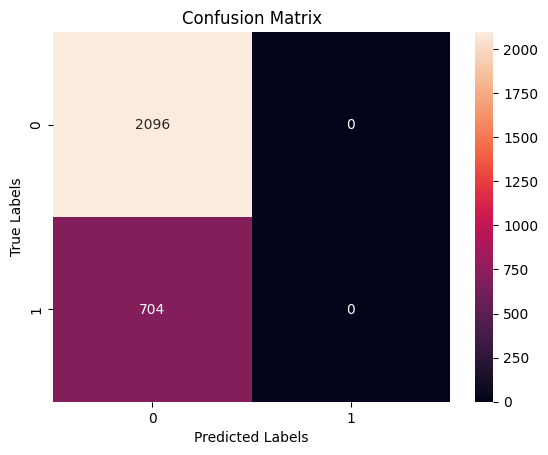

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2096
           1       0.00      0.00      0.00       704

    accuracy                           0.75      2800
   macro avg       0.37      0.50      0.43      2800
weighted avg       0.56      0.75      0.64      2800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

#Visualizations
Training History

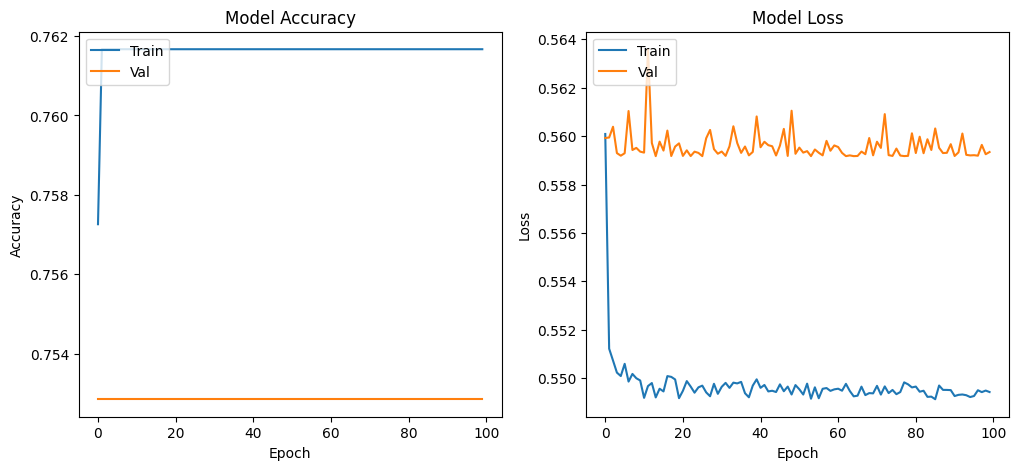

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()